# Unit 5 - Financial Planning

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

In [9]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# Compute current value of my crpto
btc_value = btc_response_data['data']['1']['quotes']['USD']['price']
eth_value = eth_response_data['data']['1027']['quotes']['USD']['price']

my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54292.80
The current value of your 5.3 ETH is $17519.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [12]:
# Format current date as ISO format
start_date = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()
today = pd.Timestamp('2021-09-12', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio.tail()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-09-03 00:00:00-04:00  115.84  115.8900  115.7707  115.85  4172690   
2021-09-07 00:00:00-04:00  115.64  115.6457  115.4737  115.55  3190893   
2021-09-08 00:00:00-04:00  115.70  115.8200  115.6200  115.74  3084384   
2021-09-09 00:00:00-04:00  115.84  116.1470  115.7550  116.10  3232335   
2021-09-10 00:00:00-04:00  115.99  116.0100  115.7801  115.87  2767552   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-09-03 00:00:00-04:00  451.98  453.63  451.5500  453.06  37843082  
2021-09-07 00:00:00-04:00  452.71  452.81  450.7423  451.52  46091753  
2021-09-08 00:00:00-04:00  450.89  451.67  448.8600  450.96  50695626  
2021-09-09 00:00:00-04:00  450.70  452.57  448.7200  448.94  51603442  
2021-09-10 00:00:00-04:00  451.04  451.49  445.3100  445.50  75763259

In [13]:
# Pick AGG and SPY close prices
close_price_df = pd.DataFrame()

close_price_df['AGG'] = df_portfolio['AGG']['close']
close_price_df['SPY'] = df_portfolio['SPY']['close']

agg_close_price = close_price_df['AGG'][-1]
spy_close_price = close_price_df['SPY'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_data = my_btc_value + my_eth_value
shares_data = my_agg_value + my_spy_value

#Create Dictionary for Dataframe
asset_data = {
        'crypto': crypto_data,
        'shares': shares_data
}

In [18]:
# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(asset_data, orient='index', columns=['Value'])
df_savings
# Display savings DataFrame
display(df_savings)

,Value
crypto,71812.109
shares,45449.000


<AxesSubplot:title={'center':'Asset Values'}, ylabel='Value'>

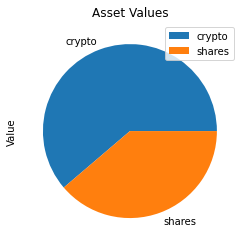

In [19]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='Value', title='Asset Values')

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_data + shares_data

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have exceeded your Emergency Fund goal of ${emergency_fund} by ${total_savings - emergency_fund}.')
elif total_savings == emergency_fund:
    print(f'Congratulations! You reached your financial goal for your Emergency Fund of ${emergency_fund}.')
elif total_savings < emergency_fund:
    print(f'Your current Savings are just ${emergency_fund - total_savings} away from your financial goal for your Emergency Fund.')

Congratulations! You have exceeded your Emergency Fund goal of $36000 by $81261.109.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [24]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981636,1.007609,1.002385,0.998184,1.010199,0.991979,0.985022,1.006227,0.997514,0.992781,...,1.006431,0.998197,1.006338,0.989032,0.996705,0.985061,0.995808,0.992938,0.999718,1.007791
2,0.978653,0.994242,1.020171,1.006080,1.014207,0.994798,0.976200,1.009964,1.020755,1.000033,...,1.004221,1.000529,0.996281,0.990595,0.989133,0.982954,0.999967,0.982059,0.998885,1.004156
3,0.972714,0.995249,1.010668,1.010747,1.021620,0.999101,0.961805,1.015378,1.034940,1.003816,...,1.012412,1.000499,0.996717,0.980405,0.985203,0.987766,0.988665,0.988227,0.996865,1.003350
4,0.970854,0.983956,1.005148,1.013764,1.028136,1.017120,0.959866,1.014885,1.043433,1.003830,...,1.024545,1.014720,1.003271,0.997549,0.994617,0.995397,0.979558,0.981329,0.989910,1.007041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.270369,11.172538,7.528629,16.527740,14.499200,14.725616,7.113893,9.678540,19.931298,39.515827,...,26.565921,11.600069,8.079544,14.088708,46.625272,16.616893,26.218829,36.073944,15.550223,22.067476
7557,12.282119,11.202359,7.555993,16.619451,14.539380,14.570466,7.134415,9.569520,20.122341,39.246867,...,26.745949,11.710629,8.017548,13.998001,46.730972,16.841331,26.642520,36.433776,15.416900,22.173092
7558,12.189710,11.203818,7.536213,16.539078,14.552747,14.453556,7.142575,9.577519,20.002596,39.516723,...,26.751336,11.652045,8.083810,14.050869,47.151704,16.841160,26.344766,35.913212,15.319227,22.121110
7559,12.230966,11.272160,7.560163,16.851913,14.455439,14.399574,7.089375,9.481344,20.091760,38.933798,...,26.692506,11.642403,8.027968,14.089592,47.471644,16.973498,26.215418,35.997419,15.388088,21.901670


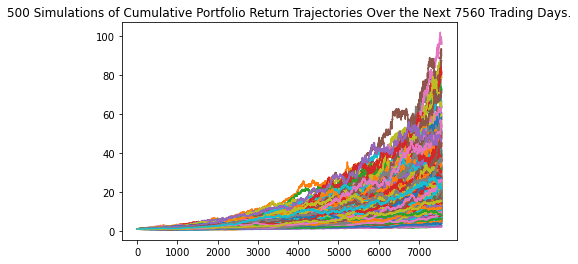

In [28]:
# Plot simulation outcomes
thirtyyear_line_plot = MC_thirtyyear.plot_simulation()

thirtyyear_line_plot.get_figure().savefig('MC_thirtyyear_sim_plot.png')

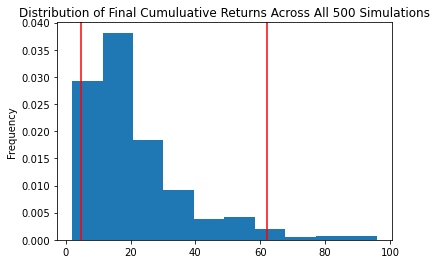

In [39]:
# Plot probability distribution and confidence intervals
thirtyyear_dist_plot = MC_thirtyyear.plot_distribution()

thirtyyear_dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png')

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_year_tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(thirty_year_tbl)

count           500.000000
mean             21.077081
std              15.302703
min               2.003857
25%              10.801197
50%              16.618026
75%              25.976699
max              95.864191
95% CI Lower      4.670375
95% CI Upper     61.939311
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_year_tbl[8] * initial_investment, 2)
ci_upper = round(thirty_year_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93407.49 and $1238786.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_year_tbl[8] * initial_investment, 2)
ci_upper = round(thirty_year_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140111.24 and $1858179.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009661,0.994905,1.007016,1.019002,0.996513,1.007251,1.001088,1.000327,0.996593,0.979925,...,1.015289,0.989635,1.016615,1.004996,1.006414,1.008353,0.979986,1.005161,1.012923,1.004513
2,1.001065,0.992217,1.013176,1.022218,0.994035,1.012351,0.989334,1.000528,0.993831,0.977743,...,1.012404,0.998959,1.011146,0.995367,0.994548,1.020552,0.973561,1.008847,1.011123,1.001997
3,1.003227,0.997035,1.004226,1.029852,1.003013,1.011498,0.990055,0.997623,1.003537,0.987780,...,1.024021,1.003211,1.004762,1.006171,0.986016,1.007275,0.981261,1.016859,1.007699,1.002579
4,0.995192,0.995100,1.008984,1.024406,1.018824,0.997464,0.999249,0.995203,0.994050,1.000596,...,1.024295,1.012944,1.023516,1.001289,0.976777,1.012443,0.985055,1.015037,1.014249,1.000250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.297534,2.164802,1.535733,1.195783,1.784336,1.476359,1.321725,1.143776,1.915867,1.770837,...,1.546354,1.410405,2.432800,1.448461,1.139961,1.989194,2.204892,1.789683,1.735782,1.371365
1257,1.282286,2.127691,1.529297,1.199673,1.799335,1.477920,1.326372,1.135540,1.916506,1.761900,...,1.546636,1.412259,2.459757,1.433546,1.138546,2.012788,2.205630,1.792216,1.748765,1.380908
1258,1.278369,2.118354,1.522961,1.192945,1.783414,1.451316,1.322899,1.135900,1.910473,1.764270,...,1.534772,1.417140,2.502741,1.442089,1.127983,1.997528,2.200900,1.784104,1.750172,1.374575
1259,1.279186,2.101788,1.542485,1.197195,1.819546,1.464750,1.318375,1.133609,1.933062,1.770757,...,1.537934,1.437903,2.537177,1.450261,1.134837,2.000134,2.218907,1.776622,1.757869,1.369645


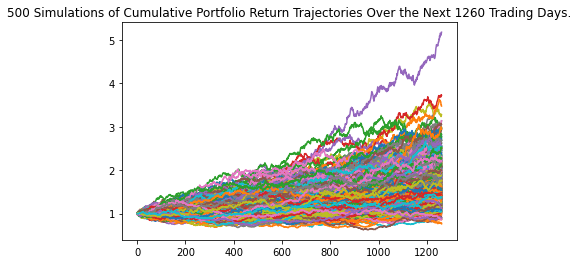

In [46]:
# Plot simulation outcomes
five_year_line_plot = MC_fiveyear.plot_simulation()

five_year_line_plot.get_figure().savefig('MC_fiveyear_sim_plot.png')

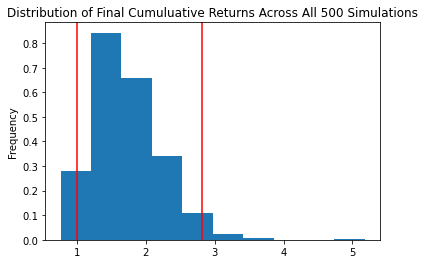

In [40]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = MC_fiveyear.plot_distribution()

five_year_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png')

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              1.731745
std               0.507772
min               0.764199
25%               1.364719
50%               1.656338
75%               2.029574
max               5.180717
95% CI Lower      0.999953
95% CI Upper      2.820301
Name: 1260, dtype: float64


In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_tbl[8] * initial_investment, 2)
ci_upper_five = round(five_year_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19999.05 and $56406.03


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 10)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993694,0.994367,1.004685,1.002985,0.991091,1.007042,1.003349,1.007903,0.985732,1.005831,...,0.968935,0.997269,0.995155,1.002576,0.985873,0.995192,0.987760,1.009361,1.012311,1.007182
2,1.007577,1.003076,0.990778,1.004884,1.000081,1.002424,1.015714,1.029860,0.991287,1.016904,...,0.974546,1.003735,0.985358,0.996554,0.995498,0.993083,0.987546,1.014104,1.010548,1.012201
3,1.031357,1.009580,0.980358,0.998774,1.015110,1.000610,1.002985,1.036272,0.989681,1.020833,...,0.968644,1.001119,0.981174,0.998089,1.000881,0.992518,1.006538,1.011249,1.017707,1.008316
4,1.027023,1.017782,0.982682,0.995080,1.014125,1.008902,1.000167,1.031646,0.981142,1.021012,...,0.963978,0.998224,0.978814,0.990308,1.004901,0.976548,1.004581,1.000226,1.002893,1.015724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.352139,1.702210,2.411053,2.074368,6.877123,3.399299,2.350834,2.756689,3.099034,3.595771,...,1.714292,1.720440,2.572807,2.271491,1.700275,1.593485,2.456428,2.937278,3.595621,2.050484
2517,3.327295,1.705954,2.423575,2.045118,6.932903,3.468349,2.330115,2.768961,3.091328,3.584915,...,1.719570,1.723913,2.584916,2.257584,1.709860,1.586823,2.463077,2.959087,3.627305,2.076522
2518,3.347850,1.685627,2.412423,2.072161,6.925853,3.442846,2.322479,2.802189,3.101364,3.639910,...,1.694077,1.719203,2.610223,2.298554,1.736479,1.594800,2.436762,2.923935,3.577729,2.074448
2519,3.377023,1.695089,2.411253,2.110509,6.935683,3.467240,2.316875,2.796262,3.182307,3.657591,...,1.715288,1.712323,2.602255,2.303517,1.718367,1.591789,2.476865,2.940697,3.590043,2.042348


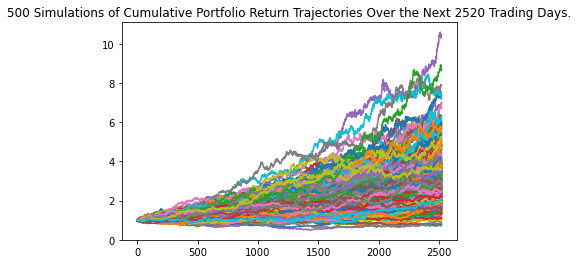

In [48]:
# Plot simulation outcomes
ten_year_line_plot = MC_tenyear.plot_simulation()

ten_year_line_plot.get_figure().savefig('MC_tenyear_sim_plot.png')

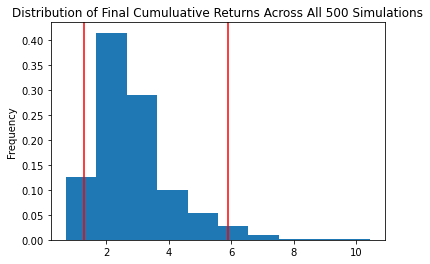

In [49]:
# Plot probability distribution and confidence intervals
ten_year_dist_plot = MC_tenyear.plot_distribution()

ten_year_dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png')

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean              2.857521
std               1.236501
min               0.703980
25%               2.035264
50%               2.578945
75%               3.432320
max              10.445189
95% CI Lower      1.290349
95% CI Upper      5.905971
Name: 2520, dtype: float64


In [51]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_tbl[8] * initial_investment, 2)
ci_upper_ten = round(ten_year_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $25806.99 and $118119.41
